# **공공데이터를 활용한 미세먼지 농도 예측**
---
## Step 1,2. 데이터 분석 및 전처리

## Import Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import joblib
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import LabelEncoder
from scipy import stats as spst
from tqdm.auto import tqdm

## Data Load

In [2]:
air_22 = pd.read_csv('air_2022.csv', sep = ',', encoding = 'utf-8', index_col = 0)
air_23 = pd.read_csv('air_2023.csv', sep = ',', encoding = 'utf-8', index_col = 0)
weather_22 = pd.read_csv('weather_2022.csv', sep = ',', encoding = 'cp949')
weather_23 = pd.read_csv('weather_2023.csv', sep = ',', encoding = 'cp949')

#### Data 구성확인

In [3]:
display(air_22.head(1))
display(air_23.head(1))
display(weather_22.head(1))
display(weather_23.head(1))

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 종로구,도시대기,111123,종로구,2022010101,0.003,0.4,0.026,0.016,23.0,12.0,서울 종로구 종로35가길 19


,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 종로구,도시대기,111123,종로구,2023010101,0.005,1.4,0.002,0.064,68.0,58.0,서울 종로구 종로35가길 19


,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,서울,2022-01-01 00:00,-8.5,NaN,NaN,NaN,1.9,NaN,320,NaN,41,NaN,1.3,-19.4,1021.9,NaN,1033.2,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0,0,NaN,NaN,2000,NaN,NaN,-7.0,NaN,-1.0,-1.0,-0.2,1.0


,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,서울,2023-01-01 0:00,0.9,NaN,NaN,9.0,1.4,NaN,200,NaN,72,NaN,4.7,-3.5,1018.5,NaN,1029.4,NaN,NaN,9.0,NaN,9.0,NaN,NaN,9,9,NaN,NaN,1503,NaN,NaN,-1.6,NaN,-0.3,-0.6,-0.5,0.6


#### Data 변수 정보 확인

In [4]:
display(air_22.info())
display(air_23.info())
display(weather_22.info())
display(weather_23.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      8760 non-null   object 
 1   망       8760 non-null   object 
 2   측정소코드   8760 non-null   int64  
 3   측정소명    8760 non-null   object 
 4   측정일시    8760 non-null   int64  
 5   SO2     8673 non-null   float64
 6   CO      8673 non-null   float64
 7   O3      8673 non-null   float64
 8   NO2     8673 non-null   float64
 9   PM10    8604 non-null   float64
 10  PM25    8655 non-null   float64
 11  주소      8760 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 889.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 5832 entries, 0 to 5831
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      5832 non-null   object 
 1   망       5832 non-null   object 
 2   측정소코드   5832 non-null   int64  
 3   측정소명    5832 non-null   object 
 4   측정일시    5832 non-null   int64  
 5   SO2     5588 non-null   float64
 6   CO      5798 non-null   float64
 7   O3      5771 non-null   float64
 8   NO2     5798 non-null   float64
 9   PM10    5792 non-null   float64
 10  PM25    5793 non-null   float64
 11  주소      5832 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 592.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             8760 non-null   int64  
 1   지점명            8760 non-null   object 
 2   일시             8760 non-null   object 
 3   기온(°C)         8760 non-null   float64
 4   기온 QC플래그       0 non-null      float64
 5   강수량(mm)        939 non-null    float64
 6   강수량 QC플래그      1568 non-null   float64
 7   풍속(m/s)        8760 non-null   float64
 8   풍속 QC플래그       0 non-null      float64
 9   풍향(16방위)       8760 non-null   int64  
 10  풍향 QC플래그       0 non-null      float64
 11  습도(%)          8760 non-null   int64  
 12  습도 QC플래그       0 non-null      float64
 13  증기압(hPa)       8760 non-null   float64
 14  이슬점온도(°C)      8760 non-null   float64
 15  현지기압(hPa)      8760 non-null   float64
 16  현지기압 QC플래그     0 non-null      float64
 17  해면기압(hPa)      8760 non-null   float64
 18  해면기압 QC플

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5832 entries, 0 to 5831
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             5832 non-null   int64  
 1   지점명            5832 non-null   object 
 2   일시             5832 non-null   object 
 3   기온(°C)         5832 non-null   float64
 4   기온 QC플래그       0 non-null      float64
 5   강수량(mm)        809 non-null    float64
 6   강수량 QC플래그      935 non-null    float64
 7   풍속(m/s)        5832 non-null   float64
 8   풍속 QC플래그       0 non-null      float64
 9   풍향(16방위)       5832 non-null   int64  
 10  풍향 QC플래그       0 non-null      float64
 11  습도(%)          5832 non-null   int64  
 12  습도 QC플래그       0 non-null      float64
 13  증기압(hPa)       5832 non-null   float64
 14  이슬점온도(°C)      5832 non-null   float64
 15  현지기압(hPa)      5832 non-null   float64
 16  현지기압 QC플래그     0 non-null      float64
 17  해면기압(hPa)      5832 non-null   float64
 18  해면기압 QC플

None

#### Data 기술통계량 확인

In [5]:
display(air_22.describe())
display(air_23.describe())
display(weather_22.describe())
display(weather_23.describe())

,측정소코드,측정일시,SO2,CO,O3,NO2,PM10,PM25
count,8760.0,8.760000e+03,8673.000000,8673.000000,8673.000000,8673.000000,8604.000000,8655.000000
mean,111123.0,2.022067e+09,0.003133,0.473458,0.030759,0.021319,31.756044,19.284575
std,0.0,3.450216e+04,0.000700,0.183086,0.019796,0.013473,22.466954,14.172678
min,111123.0,2.022010e+09,0.001000,0.200000,0.001000,0.003000,3.000000,1.000000
25%,111123.0,2.022040e+09,0.003000,0.400000,0.017000,0.011000,19.000000,10.000000
50%,111123.0,2.022070e+09,0.003000,0.400000,0.029000,0.017000,28.000000,16.000000
75%,111123.0,2.022100e+09,0.003000,0.500000,0.042000,0.028000,40.000000,25.000000
max,111123.0,2.022123e+09,0.008000,1.800000,0.144000,0.074000,385.000000,121.000000


,측정소코드,측정일시,SO2,CO,O3,NO2,PM10,PM25
count,5832.0,5.832000e+03,5588.000000,5798.000000,5771.000000,5798.000000,5792.000000,5793.000000
mean,111123.0,2.023047e+09,0.003085,0.480479,0.035430,0.020211,40.767438,20.727257
std,0.0,2.299144e+04,0.000636,0.174263,0.022049,0.012910,33.555825,16.573257
min,111123.0,2.023010e+09,0.001700,0.210000,0.001300,0.003200,3.000000,1.000000
25%,111123.0,2.023030e+09,0.002700,0.360000,0.020000,0.011300,21.000000,10.000000
50%,111123.0,2.023050e+09,0.003000,0.440000,0.032700,0.016250,32.000000,17.000000
75%,111123.0,2.023070e+09,0.003400,0.550000,0.047200,0.024300,50.000000,26.000000
max,111123.0,2.023083e+09,0.009300,1.470000,0.185900,0.080100,346.000000,142.000000


,지점,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
count,8760.0,8760.000000,0.0,939.000000,1568.0,8760.000000,0.0,8760.000000,0.0,8760.000000,0.0,8760.000000,8760.000000,8760.000000,0.0,8760.000000,0.0,4791.000000,3969.0,4791.000000,3970.0,489.000000,31.000000,8760.000000,8760.000000,4455.000000,8760.000000,0.0,1727.000000,8759.000000,15.00000,8759.000000,8759.000000,8759.000000,8759.000000
mean,108.0,13.293687,NaN,1.890415,9.0,2.370651,NaN,190.046804,NaN,64.513014,NaN,12.602785,6.184760,1006.004475,NaN,1016.256849,NaN,0.485327,9.0,1.111870,9.0,1.320450,0.729032,4.824886,3.054909,15.313805,1772.655251,NaN,3563.773596,14.939171,0.60000,14.560521,14.155257,14.000434,14.347037
std,0.0,11.336825,NaN,4.389308,0.0,1.147396,NaN,105.888658,NaN,18.538028,NaN,9.203198,12.514194,8.227316,NaN,8.669122,NaN,0.447143,0.0,0.991453,0.0,1.046731,1.091541,4.018643,3.536585,14.066694,463.688136,NaN,29182.459154,13.450504,2.32379,10.514654,10.404981,10.041081,9.676601
min,108.0,-13.700000,NaN,0.000000,9.0,0.000000,NaN,0.000000,NaN,17.000000,NaN,1.000000,-22.900000,983.300000,NaN,993.000000,NaN,0.000000,9.0,0.000000,9.0,0.100000,0.000000,0.000000,0.000000,1.000000,44.000000,NaN,1.000000,-10.500000,0.00000,-2.400000,-2.400000,-1.400000,-0.300000
25%,108.0,4.200000,NaN,0.000000,9.0,1.600000,NaN,70.000000,NaN,50.000000,NaN,4.700000,-3.600000,999.000000,NaN,1008.900000,NaN,0.000000,9.0,0.240000,9.0,0.400000,0.100000,0.000000,0.000000,7.000000,1912.750000,NaN,1.000000,3.600000,0.00000,2.800000,2.700000,3.300000,4.600000
50%,108.0,14.800000,NaN,0.100000,9.0,2.200000,NaN,230.000000,NaN,65.000000,NaN,10.100000,7.100000,1006.600000,NaN,1016.800000,NaN,0.500000,9.0,0.840000,9.0,1.300000,0.200000,5.000000,1.000000,10.000000,2000.000000,NaN,19.000000,15.000000,0.00000,15.500000,15.300000,15.200000,15.500000
75%,108.0,23.200000,NaN,1.600000,9.0,3.000000,NaN,270.000000,NaN,79.000000,NaN,19.000000,16.700000,1012.600000,NaN,1023.300000,NaN,1.000000,9.0,1.850000,9.0,1.800000,0.800000,9.000000,7.000000,16.000000,2000.000000,NaN,42.000000,24.700000,0.00000,24.200000,23.600000,23.100000,23.050000
max,108.0,35.600000,NaN,40.700000,9.0,8.800000,NaN,360.000000,NaN,100.000000,NaN,35.200000,26.800000,1024.000000,NaN,1035.300000,NaN,1.000000,9.0,3.770000,9.0,5.000000,4.300000,10.000000,10.000000,77.000000,2000.000000,NaN,421905.000000,59.800000,9.00000,33.300000,31.900000,30.200000,29.200000


,지점,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
count,5832.0,5832.000000,0.0,809.000000,935.0,5832.000000,0.0,5832.000000,0.0,5832.000000,0.0,5832.000000,5832.000000,5832.000000,0.0,5832.000000,0.0,3343.000000,2489.0,3343.000000,2489.0,76.000000,9.000000,5832.000000,5832.000000,3143.000000,5832.000000,0.0,1.655000e+03,5832.000000,8.0,5832.000000,5832.000000,5832.000000,5832.000000
mean,108.0,15.269462,NaN,1.564277,9.0,2.298182,NaN,187.042181,NaN,65.725309,NaN,14.217438,8.181944,1003.996039,NaN,1014.150926,NaN,0.461891,9.0,1.149330,9.0,1.436842,0.977778,5.044239,3.437757,15.374483,1663.644204,NaN,2.836398e+04,16.701938,0.0,15.478069,15.181190,14.634019,14.739300
std,0.0,11.100204,NaN,3.684147,0.0,1.079776,NaN,103.020643,NaN,20.220581,NaN,9.793513,12.398161,8.712943,NaN,9.160569,NaN,0.436187,0.0,1.025481,0.0,1.202203,0.912110,3.958769,3.667388,14.690920,547.207001,NaN,6.646837e+05,13.647934,0.0,10.839872,10.895837,10.453547,10.116525
min,108.0,-17.200000,NaN,0.000000,9.0,0.000000,NaN,0.000000,NaN,15.000000,NaN,0.700000,-26.200000,981.400000,NaN,990.900000,NaN,0.000000,9.0,0.000000,9.0,0.100000,0.000000,0.000000,0.000000,1.000000,23.000000,NaN,1.000000e+00,-11.400000,0.0,-3.600000,-3.500000,-2.200000,-0.400000
25%,108.0,6.100000,NaN,0.000000,9.0,1.500000,NaN,70.000000,NaN,51.000000,NaN,5.200000,-2.200000,997.200000,NaN,1006.900000,NaN,0.000000,9.0,0.215000,9.0,0.300000,0.100000,0.000000,0.000000,6.000000,1435.000000,NaN,2.000000e+00,3.800000,0.0,4.300000,4.000000,3.600000,3.800000
50%,108.0,17.600000,NaN,0.100000,9.0,2.200000,NaN,230.000000,NaN,67.000000,NaN,11.250000,8.750000,1003.000000,NaN,1013.000000,NaN,0.400000,9.0,0.860000,9.0,1.200000,0.700000,6.000000,2.000000,10.000000,2000.000000,NaN,1.900000e+01,18.000000,0.0,16.800000,16.300000,15.500000,15.350000
75%,108.0,24.800000,NaN,1.400000,9.0,2.900000,NaN,270.000000,NaN,82.000000,NaN,24.600000,20.800000,1010.700000,NaN,1021.200000,NaN,1.000000,9.0,1.940000,9.0,2.300000,1.600000,9.000000,7.000000,16.000000,2000.000000,NaN,1.901000e+03,25.600000,0.0,25.400000,25.200000,24.400000,24.500000
max,108.0,35.800000,NaN,34.700000,9.0,7.600000,NaN,360.000000,NaN,100.000000,NaN,34.800000,26.600000,1027.100000,NaN,1038.000000,NaN,1.000000,9.0,3.700000,9.0,4.500000,2.300000,10.000000,10.000000,76.000000,2000.000000,NaN,1.916020e+07,58.000000,0.0,32.900000,32.000000,30.000000,29.100000


## EDA 1단계 - 데이터 기본 탐색 및 분석

##### air data variable info

- 지역 : 서울 지역구 / 범주형 / object
- 망 : 범주형 / object
- 측정소코드 : 범주형 / int
- 측정일시 : 연속형 / int
- S02 : 아황산가스(ppm) / 연속형 / float
- CO : 일산화탄소(ppm) / 연속형 / float
- O3 : 오존(ppm) / 연속형 / float
- NO2 : 이산화질소(ppm) / 연속형 / float
- PM10 : 미세먼지($\mu g/m^3$) / 연속형 / float
- PM25 : 초미세먼지($\mu g/m^3$) / 연속형 / float

##### weather data variable info

- 지점 : 관측한 지점 코드 / 범주형 / int
- 지점명 : 관측한 지점 / 범주형 / object
- 일시 : 관측 일시 / 연속형 / object
- 기온(°C) : 기온 정보 / 연속형 / float
- 기온 QC플래그 : 기온 측정 품질검사 플래그 / ? / ?
- 강수량(mm) : 강수 측정 정보 / 연속형 / float
- 강수량 QC플래그 : 강수 측정 품질검사 플래스 / ? / float
- 풍속(m/s) : 바람 속도 / 연속형 / float
- 풍속 QC플래그 : 바람 속도 측정 품질검사 플래그 / ? / ?
- 풍향(16방위) : 풍량 정보 / 범주형 / int
- 풍향 QC플래그 : 풍량 측정 품질검사 플래그 / ? / ?
- 습도(%) : 습도 정보 / 연속형 / int
- 습도 QC플래그 : 습도 정보 품질검사 플래그 / ? / >
- 증기압(hPa) : 증기가 고체 또는 액체와 동적 평형 상태에 있을 때 증기의 압력(증기가 되려는 힘) / 연속형 / float
- 이슬점온도(°C) : 불포화 상태의 공기가 냉각될 때, 포화 상태에 도달하여 수증기의 응결이 시작되는 온도 / 연속형 / float
- 현지기압(hPa) : 지면 기압 / 연속형 / float
- 현지기압 QC플래그 : 지면 기압 측정 품질검사 플래그 / ? / ?
- 해면기압(hPa) : 수면 기압 / 연속형 /float
- 해면기압 QC플래그 : 수면 기압 측정 품질검사 플래그 / ? / ?
- 일조(hr) : 일정한 물체나 땅의 겉면에 태양 광선이 비치는 시간(1시간 중 빌율) / 연속형 / float
- 일조 QC플래그 : 일조 측정 품질검사 플래그 / ? / ?
- 일사(MJ/m2) : 태양으로부터 오는 태양 복사 에너지가 지표에 닿는 양 / 연속형 / float
- 일사 QC플래그 : 일사량 측정 품질검사 플래그 / ? / ?
- 적설(cm) : 눈이 오는 량 / 연속형 / float
- 3시간신적설(cm) : 3시간 동안 눈이 온 양 / 연속형 / float
- 전운량(10분위) : 하늘을 육안으로 관측하여 전부 구름일 떄, 10, 구름이 덮고 있는 하늘의 비율에 따라 0~10 / 범주형 / int
- 중하층운량(10분위) : 중층과 하층에 있는 구름의 분포량(날씨에 영향을 줌) / 범주형 / int
- 운형(운형약어) : 구름의 종류 / 범주형 / object
- 최저운고(100m) : 가장 낮은 구름의 높이 / 연속형 / float
- 시정(10m) : 눈을 볼 수 있는 거리 / 연속형 /int
- 지면상태(지면상태코드) : 지면의 상태 / 범주형 / 연속형
- 현상번호(국내식) : 비, 소낙비, 싸락눈, 눈보라 등의 기상현상을 나타낸 코드 번호 / 범주형 / int
- 지면온도(°C) : 지면 0cm 온도 / 연속형 / float
- 지면온도 QC플래그 : 지면 온도 측정 품질정보 플래스 / ? / ?
- 5cm 지중온도(°C) : 땅 속 5cm 온도 / 연속형 / float
- 10cm 지중온도(°C) : 땅 속 10 cm 온도 / 연속형 / float
- 20cm 지중온도(°C) : 땅 속 20 cm 온도 / 연속형 / float
- 30cm 지중온도(°C) : 땅 속 30 cm 온도 / 연속형 / float

### 결측치 확인

In [6]:
def check_nan(df):
    df_s = df.isnull().sum()
    df_p = (df_s / df.shape[0]) * 100
    
    nan_df = pd.DataFrame(columns=["SUM","PERCENT"], index=df.columns)
    nan_df["SUM"] = df_s.values
    nan_df["PERCENT"] = df_p.values
    nan_df = nan_df[nan_df["SUM"] > 0]
    return nan_df

In [7]:
air_22_nan = check_nan(air_22)
air_23_nan = check_nan(air_23)
weather_22_nan = check_nan(weather_22)
weather_23_nan = check_nan(weather_23)

display(air_22_nan)
display(air_23_nan)
display(weather_22_nan)
display(weather_23_nan)

,SUM,PERCENT
SO2,87,0.993151
CO,87,0.993151
O3,87,0.993151
NO2,87,0.993151
PM10,156,1.780822
PM25,105,1.198630


,SUM,PERCENT
SO2,244,4.183813
CO,34,0.582990
O3,61,1.045953
NO2,34,0.582990
PM10,40,0.685871
PM25,39,0.668724


,SUM,PERCENT
기온 QC플래그,8760,100.000000
강수량(mm),7821,89.280822
강수량 QC플래그,7192,82.100457
풍속 QC플래그,8760,100.000000
풍향 QC플래그,8760,100.000000
습도 QC플래그,8760,100.000000
현지기압 QC플래그,8760,100.000000
해면기압 QC플래그,8760,100.000000
일조(hr),3969,45.308219
일조 QC플래그,4791,54.691781


,SUM,PERCENT
기온 QC플래그,5832,100.000000
강수량(mm),5023,86.128258
강수량 QC플래그,4897,83.967764
풍속 QC플래그,5832,100.000000
풍향 QC플래그,5832,100.000000
습도 QC플래그,5832,100.000000
현지기압 QC플래그,5832,100.000000
해면기압 QC플래그,5832,100.000000
일조(hr),2489,42.678326
일조 QC플래그,3343,57.321674


### 결측 데이터 처리

#### Air Data

In [8]:
def mean_fill(f_cols, df):
    df_f = df[f_cols].fillna(method='ffill') # 앞의 값으로 결측치 채우기
    df_b = df[f_cols].fillna(method='bfill') # 뒤의 값으로 결측치 채우기
    
    df_fill = (df_f + df_b) / 2
    for fc in f_cols:
        df[fc] = df_fill[fc]
    return df

In [9]:
f_cols = ["SO2", "CO", "O3", "NO2", "PM10", "PM25"]
air_22 = mean_fill(f_cols, air_22)
air_23 = mean_fill(f_cols, air_23)

#### Weather Data

* QC 플래그 데이터는 데이터의 수집이 정상적으로 수집되었는 가를 판단하는 변수로 0으로 결측값 대체

In [10]:
flag_cols = ["기온 QC플래그", "강수량 QC플래그", "풍속 QC플래그", "풍향 QC플래그",
             "습도 QC플래그", "현지기압 QC플래그", "해면기압 QC플래그", "일조 QC플래그",
             "일사 QC플래그", "지면온도 QC플래그"]

weather_22[flag_cols] = weather_22[flag_cols].fillna(0)
weather_23[flag_cols] = weather_23[flag_cols].fillna(0)

* 지면온도, 지중온도에 대하여 1개의 결측치는 이전값과 이후값의 평균으로 대체한다

In [11]:
m_cols = ["지면온도(°C)", "5cm 지중온도(°C)", "10cm 지중온도(°C)",
          "20cm 지중온도(°C)", "30cm 지중온도(°C)"]
weather_22 = mean_fill(m_cols, weather_22)
weather_23 = mean_fill(m_cols, weather_23)

* 강수량의 경우는 비가 왔을 때에만 측정이 되기 때문에 결측 행에 대해서는 비가 오지 않았다고 가정하여 0으로 대체한다
* 적설과 3시간적설에 대해서도 강수량과 같이 눈이 왔을 때에만 측정이 되기 때문에 결측 행에 대해서는 눈이 오지 않았다고 가정하여 0으로 대체한다
* 일조와 일사의 경우 해가 떠있었을 경우에만 측정이 되기 때문에 결측 행에 대해서는 밤이라고 볼 수 있어서 0으로 대체한다
* 운형(운형약어), 최저운고의 결측은 구름 없이 맑은 날이라고 가정하여 0으로 대체한다

In [12]:
t_cols = ["강수량(mm)", "일조(hr)", "일사(MJ/m2)", "적설(cm)", "3시간신적설(cm)", "현상번호(국내식)",
          "운형(운형약어)", "최저운고(100m )"]
weather_22[t_cols] = weather_22[t_cols].fillna(0)
weather_23[t_cols] = weather_23[t_cols].fillna(0)

* 삭제해도 무관한 행 삭제
    * 지면상태(지면상태코드)

In [13]:
weather_22.drop('지면상태(지면상태코드)',axis=1,inplace=True)
weather_23.drop('지면상태(지면상태코드)',axis=1,inplace=True)

* 결측 처리 확인

In [14]:
air_22_nan = check_nan(air_22)
air_23_nan = check_nan(air_23)
weather_22_nan = check_nan(weather_22)
weather_23_nan = check_nan(weather_23)

display(air_22_nan)
display(air_23_nan)
display(weather_22_nan)
display(weather_23_nan)

,SUM,PERCENT


,SUM,PERCENT


,SUM,PERCENT


,SUM,PERCENT


## EDA 2단계 데이터 전처리

* Air Data 측정일시에서 time 변수로 데이터타입을 데이트타임으로 변경

In [15]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
air_22.rename(columns={'측정일시': 'time'}, inplace=True)
air_23.rename(columns={'측정일시': 'time'}, inplace=True)

air_22['time'] = pd.to_datetime(air_22['time']-1, format='%Y%m%d%H')
air_23['time'] = pd.to_datetime(air_23['time']-1, format='%Y%m%d%H')

* Weather Data 일시에서 time 변수로 데이터타입을 데이트타임으로 변경

In [16]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
weather_22.rename(columns={'일시': 'time'}, inplace=True)
weather_23.rename(columns={'일시': 'time'}, inplace=True)

weather_22['time'] = pd.to_datetime(weather_22['time'])
weather_23['time'] = pd.to_datetime(weather_23['time'])

* time 기준으로 데이터 병합

In [17]:
df_22 = pd.merge(air_22, weather_22, on='time', how='inner')
df_23 = pd.merge(air_23, weather_23, on='time', how='inner')

In [18]:
df_22.head(2)

,지역,망,측정소코드,측정소명,time,SO2,CO,O3,NO2,PM10,PM25,주소,지점,지점명,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,서울 종로구,도시대기,111123,종로구,2022-01-01 00:00:00,0.003,0.4,0.026,0.016,23.0,12.0,서울 종로구 종로35가길 19,108,서울,-8.5,0.0,0.0,0.0,1.9,0.0,320,0.0,41,0.0,1.3,-19.4,1021.9,0.0,1033.2,0.0,0.0,9.0,0.0,9.0,0.0,0.0,0,0,0,0.0,2000,0.0,-7.0,0.0,-1.0,-1.0,-0.2,1.0
1,서울 종로구,도시대기,111123,종로구,2022-01-01 01:00:00,0.003,0.4,0.022,0.020,20.0,9.0,서울 종로구 종로35가길 19,108,서울,-9.2,0.0,0.0,0.0,1.8,0.0,270,0.0,42,0.0,1.3,-19.7,1022.2,0.0,1033.6,0.0,0.0,9.0,0.0,9.0,0.0,0.0,0,0,0,0.0,2000,0.0,-7.2,0.0,-1.1,-1.1,-0.2,1.0


* 사용하지 않을 변수 제거
    * 지역, 명, 측정소코드, 측정소명, 주소, 지점, 지점명

In [19]:
drop_cols = ["지역", "망", "측정소코드", "측정소명", "주소", "지점", "지점명"]
df_22.drop(drop_cols, axis=1, inplace=True)
df_23.drop(drop_cols, axis=1, inplace=True)

* QC 플레그 값에 따라서 오류 행 삭제
    * 플래그 종류(의미): 0(정상), 1(오류), 9(결측)

In [20]:
flag_cols = ["기온 QC플래그", "강수량 QC플래그", "풍속 QC플래그", "풍향 QC플래그",
             "습도 QC플래그", "현지기압 QC플래그", "해면기압 QC플래그", "일조 QC플래그",
             "일사 QC플래그", "지면온도 QC플래그"]

def chk_flag(df, flag_cols):
    del_rows = []
    for i in range(len(df)):
        for j in range(len(flag_cols)):
            chk_value = int(df[flag_cols[j]].iloc[i])
            if chk_value == 1 or chk_value == 9:
                del_rows.append(i)
    del_rows = list(set(del_rows))
    df = df.drop(del_rows, axis=0)
    return df

df_22 = chk_flag(df_22, flag_cols)
df_23 = chk_flag(df_23, flag_cols)

* 사용한 QC 플래그 변수 삭제

In [21]:
df_22.drop(flag_cols, axis=1, inplace=True)
df_23.drop(flag_cols, axis=1, inplace=True)

* time 변수를 인덱스로 지정

In [22]:
df_22.set_index('time', inplace=True)
df_23.set_index('time', inplace=True)
df_22.sort_index(inplace=True)
df_23.sort_index(inplace=True)

* 구름의 운형을 문자형 범주를 숫자형 범주로 변환

In [23]:
cloud_list = []
cloud_list.extend(df_22["운형(운형약어)"].astype(str).unique().tolist())
cloud_list.extend(df_23["운형(운형약어)"].astype(str).unique().tolist())
cloud_list = sorted(list(set(cloud_list)))
print(f"운형 : {len(cloud_list)}")

values = range(1, len(cloud_list) + 1)

cloud_dict = {key: value for key, value in zip(cloud_list,values)}
print(cloud_dict)

운형 : 37
{'0': 1, 'Ac': 2, 'AcCc': 3, 'AcCi': 4, 'AcCs': 5, 'As': 6, 'AsCi': 7, 'AsCs': 8, 'CbStNs': 9, 'Cc': 10, 'Ci': 11, 'Cs': 12, 'Cu': 13, 'CuAc': 14, 'CuAcCi': 15, 'CuAs': 16, 'CuCi': 17, 'CuSc': 18, 'CuScAc': 19, 'CuScAcCi': 20, 'CuScAs': 21, 'CuScCi': 22, 'Sc': 23, 'ScAc': 24, 'ScAcCc': 25, 'ScAcCi': 26, 'ScAcCs': 27, 'ScAs': 28, 'ScAsCi': 29, 'ScAsCs': 30, 'ScCc': 31, 'ScCi': 32, 'ScCs': 33, 'St': 34, 'StAs': 35, 'StCi': 36, 'StNs': 37}


In [24]:
df_22["운형(운형약어)"] = df_22["운형(운형약어)"].astype(str).replace(cloud_dict)
df_23["운형(운형약어)"] = df_23["운형(운형약어)"].astype(str).replace(cloud_dict)

* 현상번호 -> https://data.kma.go.kr/community/board/detailBoard.do?bbrdTypeNo=3&pgmNo=95&bbrdNo=1015
    * 40번대 : 먼지 현상
        * Dust 변수를 추가하여 먼지현상이 있었는지 유/무 확인

In [25]:
def chk_dust(df):
    dust_csode = [str(s).zfill(2) for s in range(40,49)]
    dust_list = []
    for i in range(len(df)):
        # 현상번호는 두자리의 코드가 여러개 이어붙어져 있을 수 있다.
        state_code = str(df["현상번호(국내식)"].iloc[i]).zfill(2)
        state_list = [state_code[i:i+2] for i in range(0, len(state_code), 2)]
        dust_flag = False
        for j in range(len(state_list)):
            code = str(state_list[j]).zfill(2)
            if code in dust_csode:
                dust_list.append(1)
                dust_flag = True
                break
        if dust_flag != True:
            dust_list.append(0)
    df["Dust"] = dust_list
    return df

In [26]:
df_22 = chk_dust(df_22)
df_23 = chk_dust(df_23)

In [27]:
df_22.columns

Index(['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '기온(°C)', '강수량(mm)',
       '풍속(m/s)', '풍향(16방위)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)',
       '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)', '적설(cm)', '3시간신적설(cm)', '전운량(10분위)',
       '중하층운량(10분위)', '운형(운형약어)', '최저운고(100m )', '시정(10m)', '현상번호(국내식)',
       '지면온도(°C)', '5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)',
       '30cm 지중온도(°C)', 'Dust'],
      dtype='object')

### 상관관계 시각화

In [28]:
# Apple Mac 기준 코드
plt.rc('font', family='AppleGothic')
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# # Window 기준 코드
# plt.rc('font', family='Malgun Gothic')
# sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
#         rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
#         style='darkgrid')

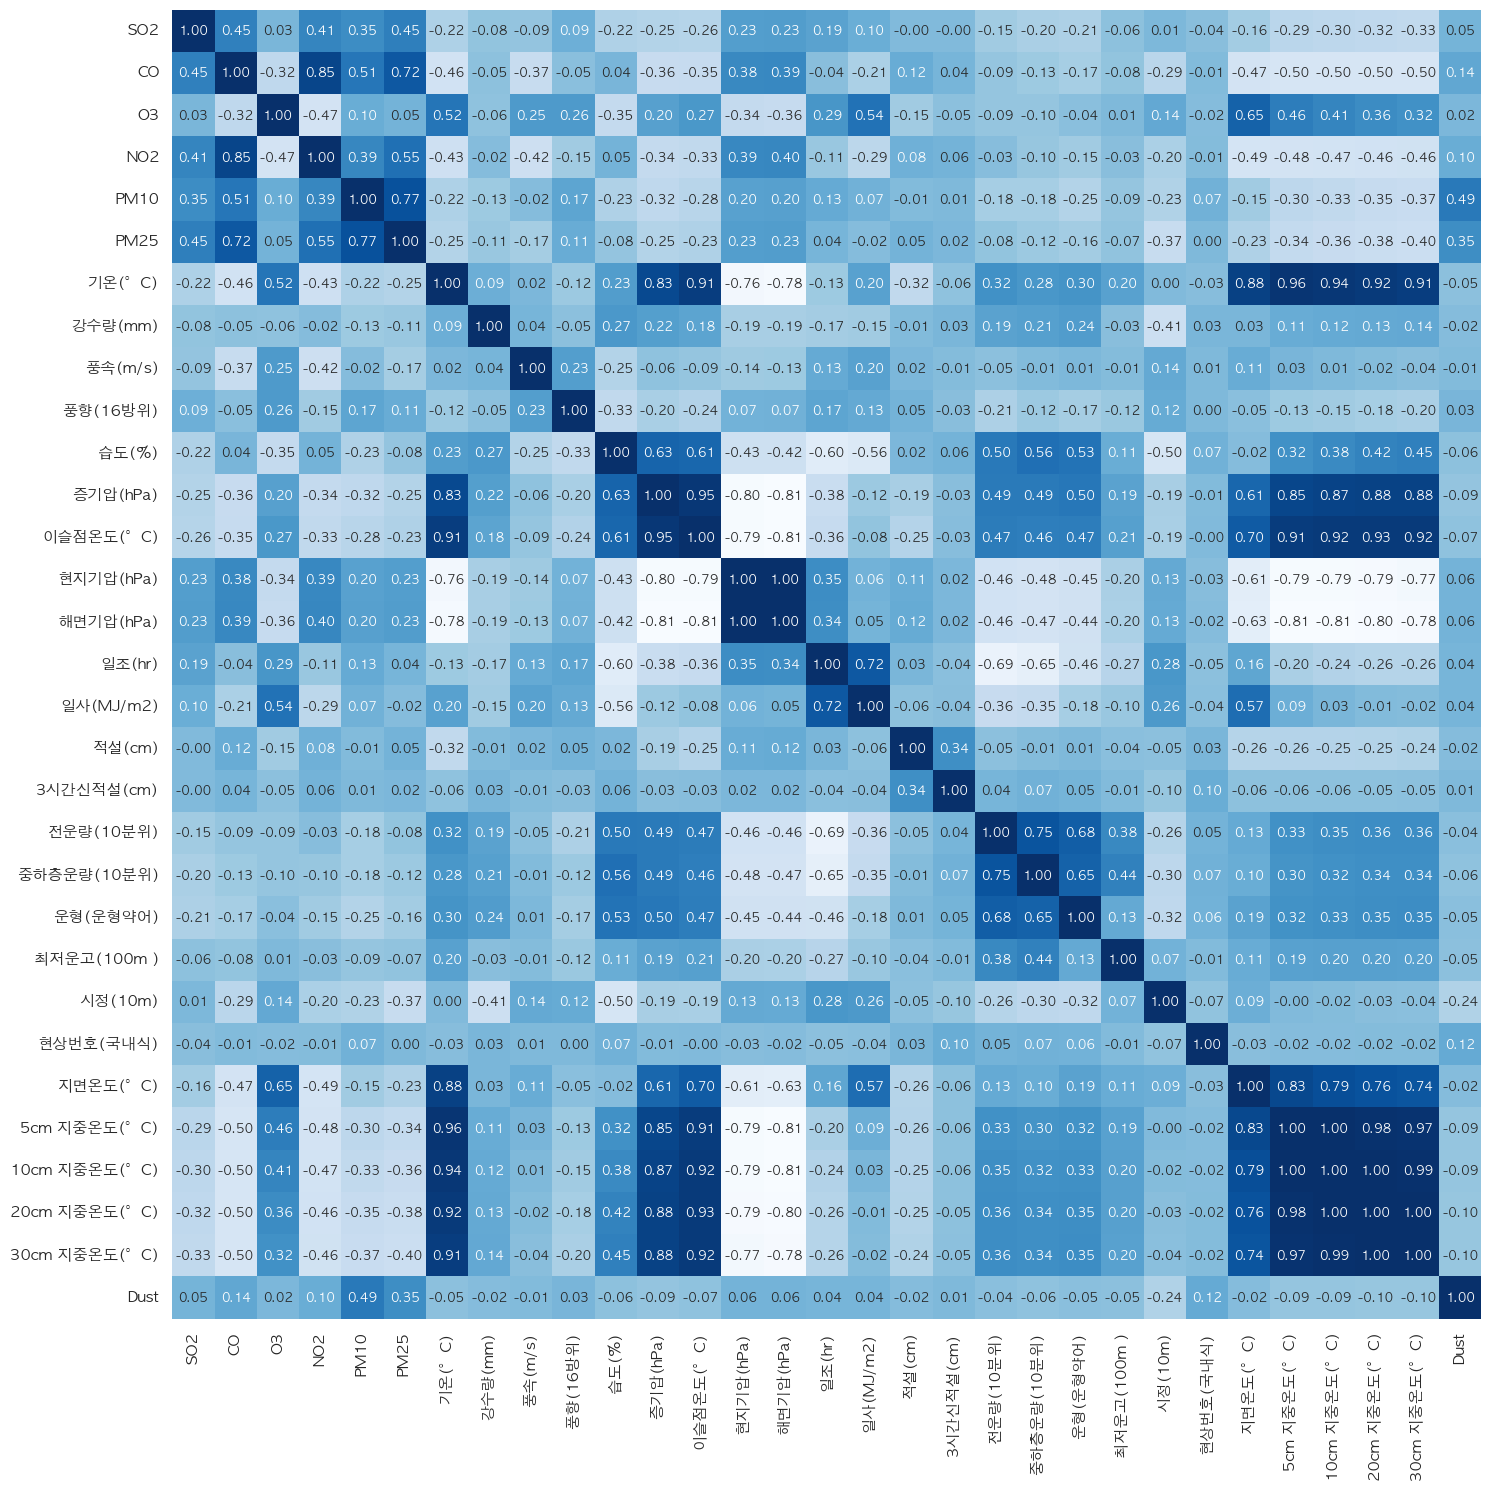

In [29]:
# 상관관계 확인
data_corr = df_22.corr(numeric_only =True)

plt.figure(figsize=(20,17))
sns.heatmap(data=data_corr,
            cmap='Blues',
            cbar=False,
            annot=True,
            square=True,
            fmt='.2f',
            annot_kws={'size':9}
            )
plt.show()

* 전일 같은 시간 미세먼지 농도 변수 추가

In [30]:
df_22.sort_index(inplace=True)
df_23.sort_index(inplace=True)

In [31]:
df_22['month'] = df_22.index.month
df_22['day'] = df_22.index.day
df_22['hour'] = df_22.index.hour

df_23['month'] = df_23.index.month
df_23['day'] = df_23.index.day
df_23['hour'] = df_23.index.hour

In [32]:
# 24시간 전 미세먼지 농도 변수 추가
df_22["PM10_reg_1d"] = df_22["PM10"].shift(24, fill_value=0)
df_23["PM10_reg_1d"] = df_23["PM10"].shift(24, fill_value=0)

* t+1 시점의 미세먼지 농도 데이텃 설정
    * t+1 시점은 1시간 후
    * t+1 시점의 미세먼지 농도는 머신러닝 모델을 통해 예측하려는 y값(target)

In [33]:
df_22["PM10_1"] = df_22["PM10"].shift(-1, fill_value=0)
df_23["PM10_1"] = df_23["PM10"].shift(-1, fill_value=0)

## 데이터 저장

In [34]:
target = ["PM10_1"]
X_train = df_22.drop(target, axis=1)
y_train = df_22[target]

X_test = df_23.drop(target, axis=1)
y_test = df_23[target]

X_train.to_csv("./train_x.csv",index=False)
y_train.to_csv("./train_y.csv",index=False)
X_test.to_csv("./test_x.csv",index=False)
y_test.to_csv("./test_y.csv",index=False)